In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [29]:
# data source

infos = 'https://raw.githubusercontent.com/olivierla412/Files/main/breast%20cancer.csv'

In [30]:
# Get the csv data here and print head

data = pd.read_csv(infos)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
# Print summary

print('\n Shape     =====>',data.shape,'\n')
print('Each column and data type and its count:','\n')
print(data.info())


 Shape     =====> (569, 33) 

Each column and data type and its count: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  textur

In [32]:
# Drop Alert1 : Unnamed: 32  column has all nulls safe to remove the column

data = data.drop(['Unnamed: 32','id'],axis=1)

In [33]:
## Let's see the DataFrame statistic

data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
## checking for null values

#data.isnull().sum()

In [34]:
## To see the count quantitis of (B) and (M)

print('Belign Tumor(B) ===>',data.diagnosis.value_counts()[0])
print('Malignant Tumor(M) ===>',data.diagnosis.value_counts()[1])

Belign Tumor(B) ===> 357
Malignant Tumor(M) ===> 212


<function matplotlib.pyplot.show(close=None, block=None)>

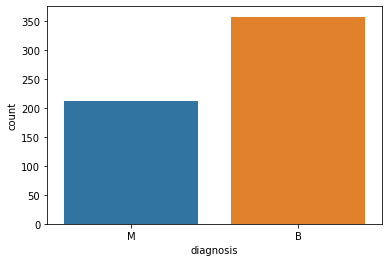

In [10]:
# Plot each Class frequency
sns.countplot(x='diagnosis',data=data)
plt.show

In [35]:
## Drop the categorical daata

new_data = data.drop('diagnosis',axis=1)

In [36]:
new_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
new_data.to_csv('data_features.csv')

In [39]:
new_data_without_header = np.genfromtxt('data_features.csv',
                              delimiter=',',
                             skip_header=1)


In [40]:
new_data_without_header

array([[  0.     ,  17.99   ,  10.38   , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [  1.     ,  20.57   ,  17.77   , ...,   0.186  ,   0.275  ,
          0.08902],
       [  2.     ,  19.69   ,  21.25   , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [566.     ,  16.6    ,  28.08   , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [567.     ,  20.6    ,  29.33   , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [568.     ,   7.76   ,  24.54   , ...,   0.     ,   0.2871 ,
          0.07039]])

In [17]:
np.set_printoptions(suppress= True)

In [42]:
np.isnan(new_data_without_header).sum()

0

## Let's remove the Outlier Using __Zscore__

In [43]:
from scipy import stats
import numpy as np
z= np.abs(stats.zscore(new_data_without_header))
print(z)

[[1.72900945 1.09706398 2.07333501 ... 2.29607613 2.75062224 1.93701461]
 [1.72292139 1.82982061 0.35363241 ... 1.0870843  0.24388967 0.28118999]
 [1.71683333 1.57988811 0.45618695 ... 1.95500035 1.152255   0.20139121]
 ...
 [1.71683333 0.70228425 2.0455738  ... 0.41406869 1.10454895 0.31840916]
 [1.72292139 1.83834103 2.33645719 ... 2.28998549 1.91908301 2.21963528]
 [1.72900945 1.80840125 1.22179204 ... 1.74506282 0.04813821 0.75120669]]


In [54]:
print('--Row numbers--    \n',np.where(z > 3)[0])
print('\n\n--Columns numbers--    \n',np.where(z > 3)[1])

--Row numbers--    
 [  0   3   3   3   3   3   3   3   3   9   9   9  12  12  12  12  12  14
  14  23  25  31  31  35  42  42  42  60  68  68  68  68  71  71  71  71
  72  78  78  78  78  78  82  82  82  82  82  82  82  83 105 105 108 108
 108 108 108 108 112 112 116 119 119 122 122 122 122 122 122 122 122 122
 122 122 122 122 122 122 138 138 146 146 146 151 151 152 152 152 152 152
 152 176 176 180 180 180 180 180 180 180 181 181 190 190 190 190 190 192
 202 203 212 212 212 212 212 212 212 213 213 213 213 213 219 219 232 236
 236 239 239 258 258 258 259 259 265 265 265 265 265 288 288 290 290 314
 314 318 323 339 339 345 351 352 352 352 352 352 352 352 352 368 368 370
 376 376 376 379 379 379 388 389 400 416 417 417 430 461 461 461 461 461
 461 461 461 461 461 461 473 503 503 503 503 503 503 504 504 505 505 521
 521 521 557 559 561 562 562 562 567 567 567 567 568]


--Columns numbers--    
 [ 6  5  6 10 19 25 26 29 30 26 27 30 12 13 16 18 20 26 30 24  9 29 30 29
 16 19 26  9 16 17 18 

In [44]:
# abcd = np.where(z >3)

In [51]:
index = np.where(z > 3)[0]

In [52]:
new_data.shape

(569, 30)

In [53]:
print(index)

[  0   3   3   3   3   3   3   3   3   9   9   9  12  12  12  12  12  14
  14  23  25  31  31  35  42  42  42  60  68  68  68  68  71  71  71  71
  72  78  78  78  78  78  82  82  82  82  82  82  82  83 105 105 108 108
 108 108 108 108 112 112 116 119 119 122 122 122 122 122 122 122 122 122
 122 122 122 122 122 122 138 138 146 146 146 151 151 152 152 152 152 152
 152 176 176 180 180 180 180 180 180 180 181 181 190 190 190 190 190 192
 202 203 212 212 212 212 212 212 212 213 213 213 213 213 219 219 232 236
 236 239 239 258 258 258 259 259 265 265 265 265 265 288 288 290 290 314
 314 318 323 339 339 345 351 352 352 352 352 352 352 352 352 368 368 370
 376 376 376 379 379 379 388 389 400 416 417 417 430 461 461 461 461 461
 461 461 461 461 461 461 473 503 503 503 503 503 503 504 504 505 505 521
 521 521 557 559 561 562 562 562 567 567 567 567 568]


### Another way, after dropping the categorical data which contain M and B
### we can use that new data frame

In [55]:
from scipy import stats
import numpy as np
z_1= np.abs(stats.zscore(new_data))
print(z_1)

[[1.09706398 2.07333501 1.26993369 ... 2.29607613 2.75062224 1.93701461]
 [1.82982061 0.35363241 1.68595471 ... 1.0870843  0.24388967 0.28118999]
 [1.57988811 0.45618695 1.56650313 ... 1.95500035 1.152255   0.20139121]
 ...
 [0.70228425 2.0455738  0.67267578 ... 0.41406869 1.10454895 0.31840916]
 [1.83834103 2.33645719 1.98252415 ... 2.28998549 1.91908301 2.21963528]
 [1.80840125 1.22179204 1.81438851 ... 1.74506282 0.04813821 0.75120669]]


In [57]:
print('--Row numbers--    \n',np.where(z_1 > 3)[0])
print('\n\n--Columns numbers--    \n',np.where(z_1 > 3)[1])

--Row numbers--    
 [  0   3   3   3   3   3   3   3   3   9   9   9  12  12  12  12  12  14
  14  23  25  31  31  35  42  42  42  60  68  68  68  68  71  71  71  71
  72  78  78  78  78  78  82  82  82  82  82  82  82  83 105 105 108 108
 108 108 108 108 112 112 116 119 119 122 122 122 122 122 122 122 122 122
 122 122 122 122 122 122 138 138 146 146 146 151 151 152 152 152 152 152
 152 176 176 180 180 180 180 180 180 180 181 181 190 190 190 190 190 192
 202 203 212 212 212 212 212 212 212 213 213 213 213 213 219 219 232 236
 236 239 239 258 258 258 259 259 265 265 265 265 265 288 288 290 290 314
 314 318 323 339 339 345 351 352 352 352 352 352 352 352 352 368 368 370
 376 376 376 379 379 379 388 389 400 416 417 417 430 461 461 461 461 461
 461 461 461 461 461 461 473 503 503 503 503 503 503 504 504 505 505 521
 521 521 557 559 561 562 562 562 567 567 567 567 568]


--Columns numbers--    
 [ 5  4  5  9 18 24 25 28 29 25 26 29 11 12 15 17 19 25 29 23  8 28 29 28
 15 18 25  8 15 16 17 

## save the rows in index_1 variable , we are interested in only rows 


In [59]:
## save the rows in index_1 variable , we are interested in only rows 

index_1 =np.where(z_1 > 3)[0]

In [ ]:
## Replace Label column (diagnosis) into Binary codes ,from source data

data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})

#### Remove where record have  z_1 > 3  (Row numbers )


In [72]:
## Remove where record have  z_1 > 3  (Row numbers )

data = data.drop(data.index[index_1])

In [89]:
data.shape

# this is the clean data

(495, 31)

## Unising SelectKBest feature Selection method to select best features
#### SelectKBest use f_classification to find the best features, where __f_classif__ uses __ANOVA test__.

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif

### Now divide the the clean data into feature __(X)__ and label __(Y)__

In [75]:
X = data.drop('diagnosis',axis=1)
Y = data.diagnosis

In [76]:
## Here we give lenght of the best features is:  k  =  17
    
best_features = SelectKBest(score_func= f_classif, k= 17)

fit = best_features.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatinate DataFrames

features_scores = pd.concat([df_columns, df_scores],axis=1)

## naming
features_scores.columns = ['Feature_Name','Score'] # naming output columns

print(features_scores.nlargest(17,'Score')) # print 17 best features

## export select features to .csv

df_univ_feat = features_scores.nlargest(17,'Score')

df_univ_feat.to_csv('variable_selection.csv',index= False)

            Feature_Name       Score
22       perimeter_worst  885.034320
20          radius_worst  851.489347
7    concave points_mean  822.656614
23            area_worst  793.749507
27  concave points_worst  765.662541
2         perimeter_mean  650.547521
6         concavity_mean  644.978361
3              area_mean  617.398450
0            radius_mean  601.236825
13               area_se  462.214659
26       concavity_worst  443.663100
10             radius_se  325.009571
12          perimeter_se  304.765782
5       compactness_mean  280.311672
25     compactness_worst  255.088911
17     concave points_se  130.577096
21         texture_worst  120.616098


In [79]:
##  from  the source data , get only the 17 columns matching with this and store it.

new_X = data[df_univ_feat.Feature_Name]

In [80]:
df_univ_feat

,Feature_Name,Score
22,perimeter_worst,885.034320
20,radius_worst,851.489347
7,concave points_mean,822.656614
23,area_worst,793.749507
27,concave points_worst,765.662541
2,perimeter_mean,650.547521
6,concavity_mean,644.978361
3,area_mean,617.398450
0,radius_mean,601.236825
13,area_se,462.214659


## Building the model to test unexposed data

##### Bringing the 17 selected feauture the same Scale


In [84]:
## bring the 17 selected feauture the same Scale

scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

In [85]:
X_scalar

array([[ 1.93887045,  2.21566986,  0.82614227, ..., -0.35546782,
         0.51102822, -0.30781919],
       [ 1.71612918,  1.87156245,  2.60149804, ...,  1.54007241,
         1.99724809,  0.06672045],
       [ 1.70552245,  1.62196342,  1.87573334, ..., -0.20886025,
         1.63914776, -1.49857258],
       ...,
       [ 2.19696748,  2.32714128,  2.9397782 , ..., -0.15866309,
         2.81694595,  0.22042304],
       [ 1.80451857,  1.90064195,  1.67922332, ..., -0.31084812,
         1.21066933,  2.3139583 ],
       [ 0.80395064,  0.7592716 ,  0.29873275, ...,  0.62297834,
         0.96020609,  1.58431268]])

In [86]:
# Building the model to test unexposed data:-


## spliting the data to fit it with the model:
x_train,x_test,y_train,y_test = train_test_split(X_scalar,Y,test_size=0.25,random_state=355)


## Initialization of KNeighborsClassifier model:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred= knn.predict(x_test)

In [87]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[76,  1],
       [ 3, 44]])

## Let's check the precison and accuracy ?


In [88]:
## How to get precison and accuracy

print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.98      0.94      0.96        47

    accuracy                           0.97       124
   macro avg       0.97      0.96      0.97       124
weighted avg       0.97      0.97      0.97       124



# accuracy  = 0.97